In [43]:
#Import Data
import pandas as pd


In [44]:
##Ecom_Cust_Survey = pd.read_csv('...',header = 0)
df = pd.read_csv('Ecom_Cust_Survey.csv',header = 0)

df.dropna(inplace=True) # to remove all the missing values rows..
#Q 1. How many customers have participated in the survey?
df.info()
#ANS: 11805


<class 'pandas.core.frame.DataFrame'>
Index: 11805 entries, 0 to 11804
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cust_num              11805 non-null  float64
 1   Region                11805 non-null  object 
 2   Age                   11805 non-null  float64
 3   Order Quantity        11805 non-null  float64
 4   Customer_Type         11805 non-null  object 
 5   Improvement Area      11805 non-null  object 
 6   Overall_Satisfaction  11805 non-null  object 
dtypes: float64(3), object(4)
memory usage: 737.8+ KB


In [45]:
#Q.2 Overall most of the customers are satisfied or dis-satisfied?
#total number of customers
df.shape

(11805, 7)

In [46]:
#number of satisfied customers
freq=df['Overall_Satisfaction'].value_counts(sort=False)
print(freq)


Overall_Satisfaction
Dis Satisfied    6408
Satisfied        5397
Name: count, dtype: int64


In [47]:
#Q 3. Can you segment the data and find the concentrated satisfied and dis-satisfied customer segments ?
#solution:
# We will create a tree model in python using the sci-kit module
# before that we will need to convert most of the feature data into numerical or hash values as scikit only works with numerical data


df['Region'] = df['Region'].map( {'EAST': 1, 'WEST': 2, 'NORTH': 3, 'SOUTH':4} ).astype(int)
df['Customer_Type'] = df['Customer_Type'].map({'Prime': 1, 'Non_Prime': 0}).astype(int)


In [48]:
#We will also need to change the column names, as '.' and spaces are part of many basic function in python
df.rename(columns={'Order Quantity':'Order_Quantity', 'Improvement Area' :'Improvement_Area'}, inplace=True)
df['Improvement_Area'] = df['Improvement_Area'].map({'Website UI':1, 'Packing & Shipping':2, 'Product Quality':3,}).astype(int)
df['Overall_Satisfaction'] = df['Overall_Satisfaction'].map( {'Dis Satisfied': 0, 'Satisfied': 1} ).astype(int)


In [49]:
#Need the library to create the tree
from sklearn import tree

In [50]:
#Defining Features and lables, ignoring cust_num and target variable
features= list(df.columns[2:6])


In [51]:

X = df[features]
y = df['Overall_Satisfaction']


In [37]:
#Building Tree Model
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X,y)


DecisionTreeClassifier(max_depth=2)

In [38]:
!pip install graphviz

In [39]:
!pip install pydotplus

In [40]:
#What are the major characteristics of satisfied customers?

#Plotting the trees
#Unfortunately drawing a beautiful tree is not easy in python, Still
#you will need to install pydot
#use this command in your anaconda prompt: conda install -c anaconda pydot=1.0.28


In [55]:
from IPython.display import Image
from six import StringIO

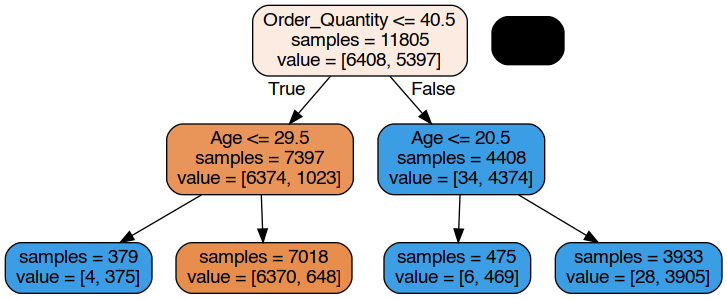

In [56]:
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf,
                     out_file = dot_data,
                     feature_names = features,
                     filled=True, rounded=True,
                     impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
#by looking at the plot we can answer two questions:
#Q.5 What are the major characteristics of satisfied customers?

#Major_characteristics= Order.Quantity<40 & Age<30 | Order.Quantity >=40

#Q 6. What are the major characteristics of dis-satisfied customers?
#Major_characteristics= Order.Quantity<40 & Age>=30

In [57]:
#LAB : Tree Validation
########################################
##########Tree Validation
#Tree Validation
X


,Age,Order_Quantity,Customer_Type,Improvement_Area
0,45.0,24.0,1,3
1,20.0,75.0,1,3
2,28.0,70.0,1,2
3,66.0,28.0,1,1
4,22.0,39.0,1,1
...,...,...,...,...
11800,62.0,22.0,0,2
11801,37.0,29.0,0,3
11802,55.0,6.0,0,1
11803,32.0,19.0,0,2


In [58]:
predict1 = clf.predict(X)
predict1

array([0, 1, 1, ..., 0, 0, 1])

In [59]:
from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y, predict1)
print (cm)


[[6370   38]
 [ 648 4749]]


In [60]:
total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

0.9418890300720034
